This file covers-
-> How to Implement Perceptron
-> Understand Vectorization
-> Meaning of Linear Classifier

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs,make_moons

Generating Data

In [35]:
# X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)
X,Y = make_moons(n_samples=500,shuffle=True,noise=0.2,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


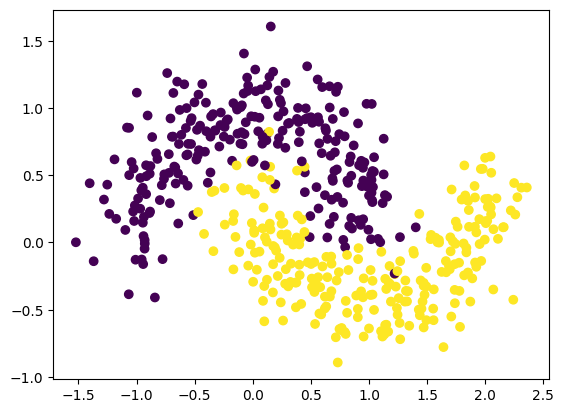

In [36]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Model & Helper Function

In [37]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the predictions

In [38]:
def predict(X,weights):
    # X -> mx(n+1) matrix, w--> (nX1) vector
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    # Binary cross entropy
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    # perform weight updates for 1 epoch
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)

    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate,max_epochs):
    # modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))

    # init Weights 0
    weights = np.zeros(X.shape[1])

    # iterate over all epochs and make updates
    for epoch in range(max_epochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))

    return weights

In [39]:
weights = train(X,Y,learning_rate=0.8,max_epochs=1000)

Epoch 0 Loss 0.6205
Epoch 10 Loss 0.4003
Epoch 20 Loss 0.3513
Epoch 30 Loss 0.3285
Epoch 40 Loss 0.3147
Epoch 50 Loss 0.3054
Epoch 60 Loss 0.2986
Epoch 70 Loss 0.2936
Epoch 80 Loss 0.2897
Epoch 90 Loss 0.2867
Epoch 100 Loss 0.2842
Epoch 110 Loss 0.2823
Epoch 120 Loss 0.2807
Epoch 130 Loss 0.2794
Epoch 140 Loss 0.2784
Epoch 150 Loss 0.2775
Epoch 160 Loss 0.2768
Epoch 170 Loss 0.2761
Epoch 180 Loss 0.2756
Epoch 190 Loss 0.2752
Epoch 200 Loss 0.2748
Epoch 210 Loss 0.2745
Epoch 220 Loss 0.2742
Epoch 230 Loss 0.2739
Epoch 240 Loss 0.2737
Epoch 250 Loss 0.2736
Epoch 260 Loss 0.2734
Epoch 270 Loss 0.2733
Epoch 280 Loss 0.2731
Epoch 290 Loss 0.2730
Epoch 300 Loss 0.2730
Epoch 310 Loss 0.2729
Epoch 320 Loss 0.2728
Epoch 330 Loss 0.2727
Epoch 340 Loss 0.2727
Epoch 350 Loss 0.2726
Epoch 360 Loss 0.2726
Epoch 370 Loss 0.2726
Epoch 380 Loss 0.2725
Epoch 390 Loss 0.2725
Epoch 400 Loss 0.2725
Epoch 410 Loss 0.2725
Epoch 420 Loss 0.2724
Epoch 430 Loss 0.2724
Epoch 440 Loss 0.2724
Epoch 450 Loss 0.2724

- Make predictions
- Visualize Decision Surface
- Linear vs Non-Linear Classification

In [40]:
def getPredictions(X_Test,weights,labels = True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    
    probs = predict(X_Test,weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [46]:
# x1 = np.linspace(-8,2,10)
x1 = np.linspace(-2,2,10)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

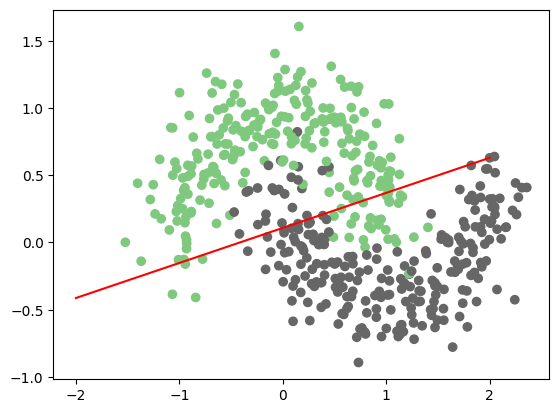

In [47]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')

In [43]:
# Find the accuracy

Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
training_acc

0.886